# EDA - ANALISIS EXPLORATORIO DE LOS DATOS

En esta etapa llevaremos a cabo nuestro analisis exploratorio por medio de visualizaciones de medidas globales, que luego seran exploradas con mayor profundidad en el dashboard aprovechando la interactividad de la herramienta. planeamos analizar como se distribuyen los accidentes y las victimas en funcion de caracteristicas demograficas, ubicacion geografica y periodos temporales

In [20]:
# importamos librerias
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [21]:
# cargamos dataframe
df_homicidios= pd.read_csv('data/df_homicidios.csv')

In [22]:
df_homicidios.head()

,Unnamed: 0,ID,N_VICTIMAS,FECHA,HORA,LUGAR_DEL_HECHO,TIPO_DE_CALLE,COMUNA,COORDENADAS_X,COORDENADAS_Y,PARTICIPANTES,VICTIMA,ACUSADO,AÑO,ROL,SEXO,EDAD,FECHA_FALLECIMIENTO,SEMESTRE
0,0,2016-0001,1,2016-01-01,04:00:00,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,8,-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO,2016,CONDUCTOR,MASCULINO,19,2016-01-01,1
1,1,2016-0002,1,2016-01-02,01:15:00,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,9,-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS,2016,CONDUCTOR,MASCULINO,70,2016-01-02,1
2,2,2016-0003,1,2016-01-03,07:00:00,AV ENTRE RIOS 2034,AVENIDA,1,-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO,2016,CONDUCTOR,MASCULINO,30,2016-01-03,1
3,3,2016-0004,1,2016-01-10,00:00:00,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,8,-58.465039,-34.680930,MOTO-SD,MOTO,NO IDENTIFICADO,2016,CONDUCTOR,MASCULINO,18,2016-01-10,1
4,4,2016-0005,1,2016-01-21,05:20:00,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,1,-58.387183,-34.622466,MOTO-PASAJEROS,MOTO,PASAJEROS,2016,CONDUCTOR,MASCULINO,29,2016-02-01,1


In [23]:
# verificamos valores nulos en el datafrae
duplicados=df_homicidios.duplicated().sum()
print(f'cantidad de valores duplicados en el dataframe: {duplicados}')

cantidad de valores duplicados en el dataframe: 0


Observamos que el dataframe no presenta valores duplicados, asi que procedemos con nuestra etapa de analisis

# Cantidad de victimas por año

Total de victimas fatales por año


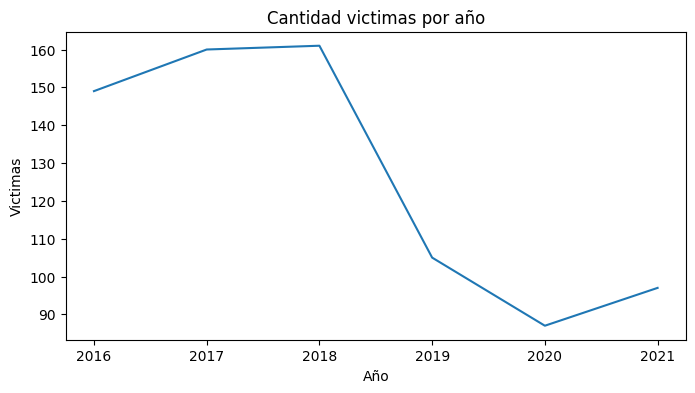

In [24]:
# primero convertimos la columna 'FECHA' a datetime
df_homicidios['FECHA']= pd.to_datetime(df_homicidios['FECHA'])

# extraemos el año de la fecha
df_homicidios['AÑO']= df_homicidios['FECHA'].dt.year

# agrupamos por año y sumar la cantidad de victimas
grouped= df_homicidios.groupby('AÑO')['N_VICTIMAS'].sum()


# creamos el grafico de lineas
plt.figure(figsize=(8,4))
plt.plot(grouped.index, grouped.values)
plt.xlabel('Año')
plt.ylabel('Victimas')
plt.title('Cantidad victimas por año')
plt.show()

**CONCLUSION**

- Durante el periodo commprendido entre el año 2016 y 2018, observamos una tendencia ascendente en los indices de victimas mortales por accidentes de transito.

- Durante el lapso entre los años 2018 y 2019, se evidencia una gran reduccion en los indices de victimas mortales en accidentes de transito.

- Evidentemente 2020 fue el año que presento menos victimas mortales en accidentes de transito, se asume que esto sucedio debido a las leyes de confinamiento por el COVID-19 que llevo a una baja conduccion de vehiculos y circulacion de peatones en las calles.


# Cantidad de victimas por accidente

In [25]:
print(df_homicidios['N_VICTIMAS'].unique())

[1 2 3]


Observamos que el numero maximo de victimas por accidente es 3. ahora, procederemos a representar gragrifcamente la distribucion de las cifras de victimas por accidente en relacion con el total de accidentes ocurridos

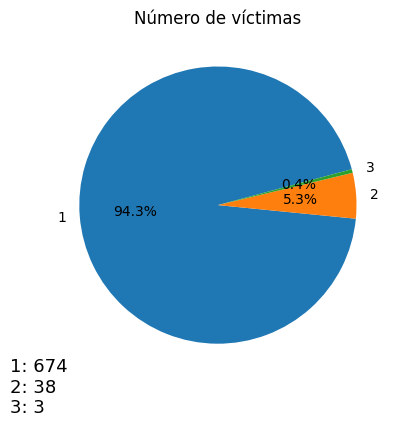

In [26]:
valores = df_homicidios['N_VICTIMAS'].value_counts()
porcentaje= valores / len(df_homicidios)

plt.figure(figsize=(4.5, 4.5))
grafico, texto, autotexto = plt.pie(porcentaje, labels=valores.index, autopct='%.1f%%', startangle=15)

conteo_por_valor= [f"{valores.index[i]}: {valores.values[i]}" for i in range(len(valores))]
plt.text(-1.5, -1.5, '\n'.join(conteo_por_valor), fontsize=13)

plt.title("Número de víctimas")
plt.show()

**CONCLUSION:**

- Se registro una victima en el 94.3% de los accidentes, sumando un total de 674 casos.

- Se registro dos victimas en el 5.3% de los accidentes, sumando un total de 38 casos.

- Se registro un total de tres victimas en el 0.4% de los accidentes, sumando un total de 3 casos.

# Porcentaje de victimas por rol

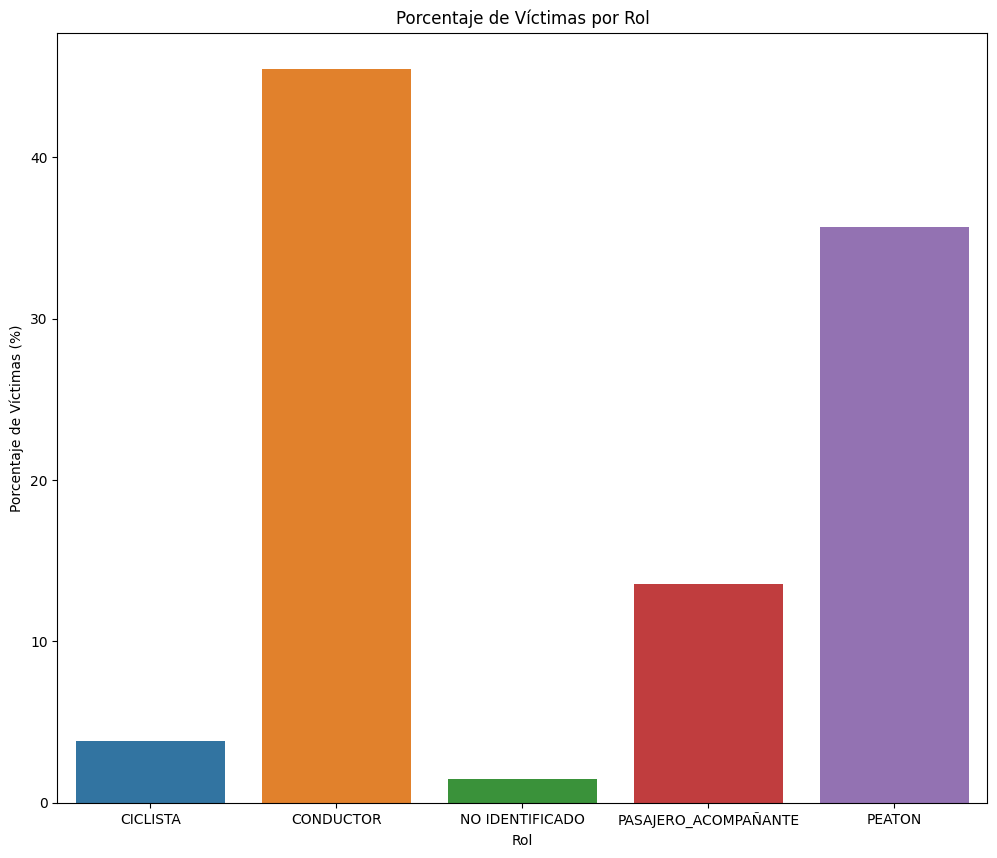

In [27]:
# calculamos el total de N_VICTIMAS
total_victimas = df_homicidios['N_VICTIMAS'].sum()

# agrupamos por ROL y calcular la suma de N_VICTIMAS para cada ROL
grouped = df_homicidios.groupby('ROL')['N_VICTIMAS'].sum()

# calculamos el porcentaje de N_VICTIMAS para cada ROL
grouped = grouped / total_victimas * 100

# convertimos la serie en un DataFrame
df_grouped = grouped.reset_index()


# creamos el gráfico de tabla
plt.figure(figsize=(12,10))
sns.barplot(x='ROL', y='N_VICTIMAS', data=df_grouped)
plt.xlabel('Rol')
plt.ylabel('Porcentaje de Víctimas (%)')
plt.title('Porcentaje de Víctimas por Rol')
plt.show()

**CONCLUSION:**

- Mas del 40% del total de victimas registradas en nuestro dataset corresponde a conductores, seguido de peatones en segundo lugar y pasajeros/acompañantes en tercer lugar

# Porcentaje de victimas por sexo

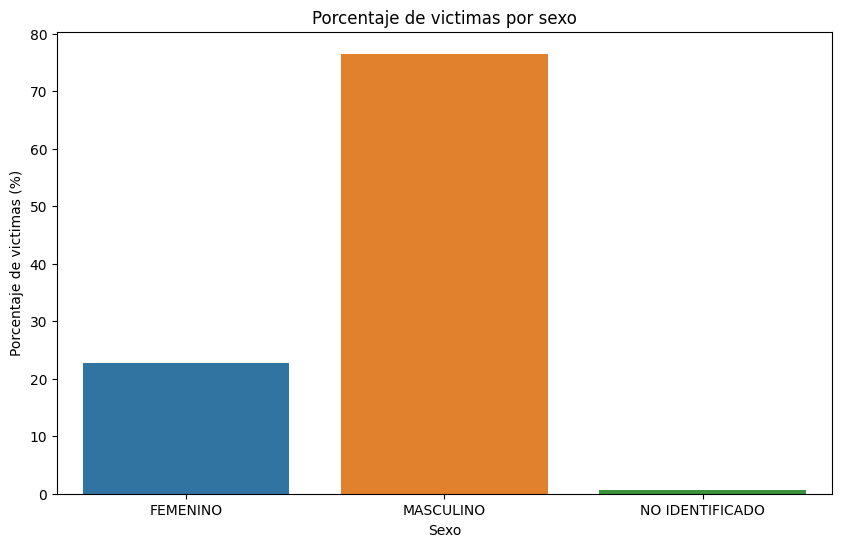

In [28]:
# calculamos el total de victimas x genero
total_victimas= df_homicidios['N_VICTIMAS'].sum()

# agrupamos por sexo y calculamos la suma de victimas para cada sexo
grouped= df_homicidios.groupby('SEXO')['N_VICTIMAS'].sum()

# calculamos el porcentaje de victimas por cada sexo
grouped= grouped / total_victimas * 100

# convertiemos la serie en un dataframe
df_grouped= grouped.reset_index()


# creamos la grafica de tabla
plt.figure(figsize=(10,6))
ax=sns.barplot(x='SEXO', y='N_VICTIMAS', data=df_grouped)
ax.set(xlabel='Sexo', ylabel='Porcentaje de victimas (%)', title='Porcentaje de victimas por sexo')
plt.show()

**CONCLUSION:**

- Observamos que mas el 70% de las victimas mortales en accidentes son hombres, mostrando una amplia diferencia con las mujeres, quienes representan un poco mas del 20% de las victimas. ademas, hay un grupo donde el sexo no esta identificado, representando al menos al 5% de las victimas

# Numero de victimas por rango de edad

**Al realizar gráficos sobre edad por rol de la victima, o edad sobre número de víctimas, el rango del eje X que representa la edad es poco legible, vamos a crear una columna "rango_edad" para poder visualizar mejor estos gráficos**

In [29]:
# creamos los rangos de la edad
bins= [0, 20, 40, 60, 90]
labels=['1-20', '21-40', '41-60', '61-90']
df_homicidios['RANGO_EDAD']= pd.cut(df_homicidios['EDAD'], bins=bins, labels=labels, right=False)

Creamos el primer grafico: **numero de victimas por rango de edad**

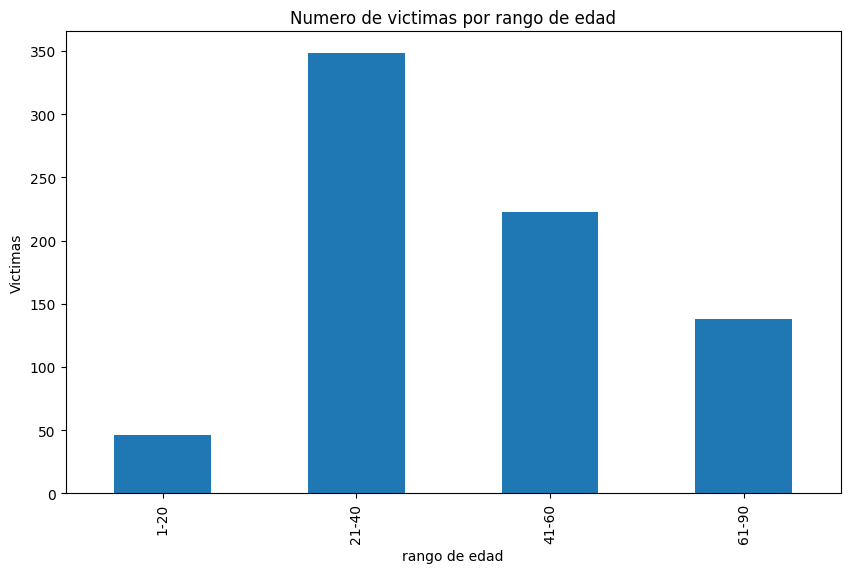

In [33]:
# creamos grafico
plt.figure(figsize=(10,6))
df_homicidios.groupby('RANGO_EDAD')['N_VICTIMAS'].sum().plot(kind='bar')
plt.xlabel('rango de edad')
plt.ylabel('Victimas')
plt.title('Numero de victimas por rango de edad')
plt.show()

**CONCLUSION:**

- Se evidencia que la mayoria de accidentes involucra a victimas que se encuentran en el rango de 21 a 40 años, siendo en su mayoria conductores masculinos


Creamos segundo grafico: **ROL por rango de edad**

<Figure size 1000x600 with 0 Axes>

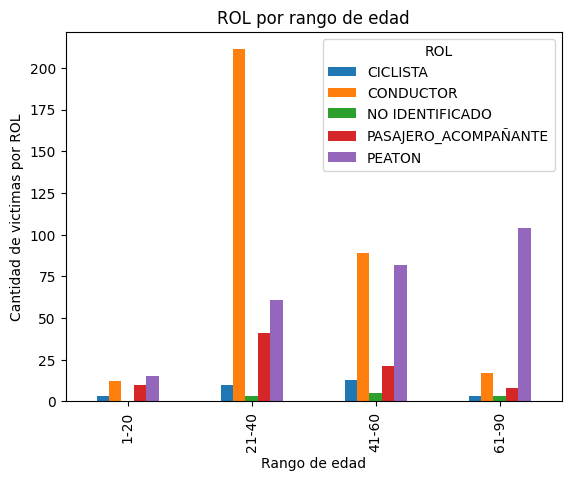

In [34]:
# creamos grafico
plt.figure(figsize=(10,6))
df_homicidios.groupby(['RANGO_EDAD', 'ROL']).size().unstack().plot(kind='bar',stacked=False)
plt.xlabel('Rango de edad')
plt.ylabel('Cantidad de victimas por ROL')
plt.title('ROL por rango de edad')
plt.show()

**CONCLUSION:**

- Los conductores que se encuentran en el rango de edad de 21 a 40 años han sido mas vulnerables a ser victimas en accidentes de transito, destacandose por una diferencia considerable en comparacion con otros roles en otros rango de edades

- Tambien podemos notar que los peatones que se encuentran en el rango de edad de 61 a 90 años han experimentado una mayor vulnerabilidad a ser victimas de accidentes que ocurren en su entorno

# Cantidad de accidentes por tipo de calle

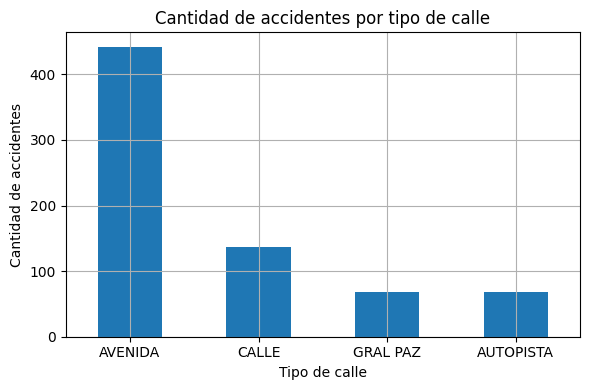

In [43]:
accidentes_por_tipo_calle= df_homicidios['TIPO_DE_CALLE'].value_counts()

# creamos grafico
plt.figure(figsize=(6,4))
accidentes_por_tipo_calle.plot(kind='bar')
plt.xlabel('Tipo de calle')
plt.ylabel('Cantidad de accidentes')
plt.title('Cantidad de accidentes por tipo de calle')
plt.xticks(rotation=0)
plt.tight_layout()
plt.grid()
plt.show()

**CONCLUSION:**

- Segun los datos del grafico, las avenidas registran el mayor numero de casos, con gran diferencia al superar los 400 casos, le siguen las calles con mas de 100 accidentes, tanto las autopistas como la general paz tienen una cantidad similar de accidentes, pero inferior a 100 casos.
Aunque las categorias se clasifican como avenidas, calles y autopistas, la general paz no se asigna a ninguna de las tres, dado que no existe un consenso sobre si se considera avenida o autopista.

# Cantidad de victimas por comuna

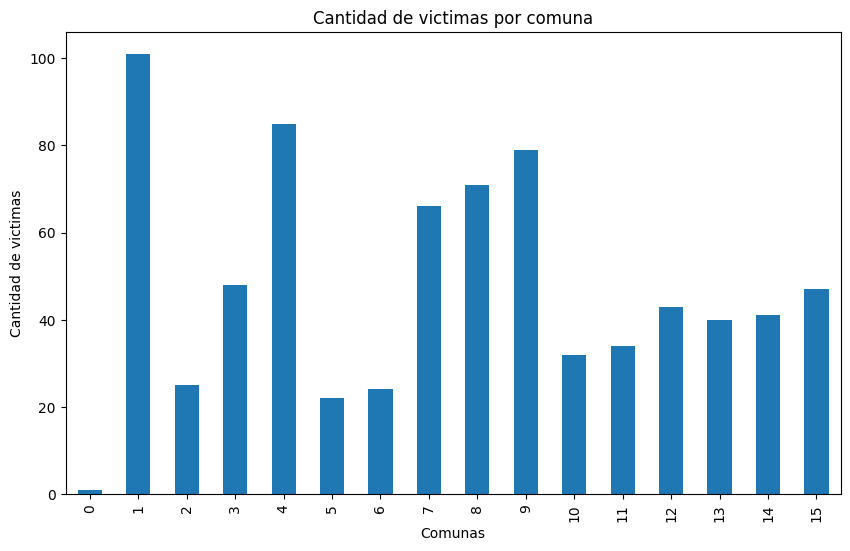

In [50]:
plt.figure(figsize=(10,6))
cantidad_victimas_comunas= df_homicidios.groupby('COMUNA')['N_VICTIMAS'].sum()
cantidad_victimas_comunas.plot(kind='bar')
plt.xlabel('Comunas')
plt.ylabel('Cantidad de victimas')
plt.title('Cantidad de victimas por comuna')
plt.show()

**CONCLUSION:**

- Podemos notar que las 3 columnas con mayor cantidad de victimas fatales son la 1, 4 y 9

# Distribucion de accidentes por victimas y acusados

**haremos dos graficas que muestren:**

- **distribucion de accidente por tipo de victima**

- **distribucion de accidente por tipo de acusado**

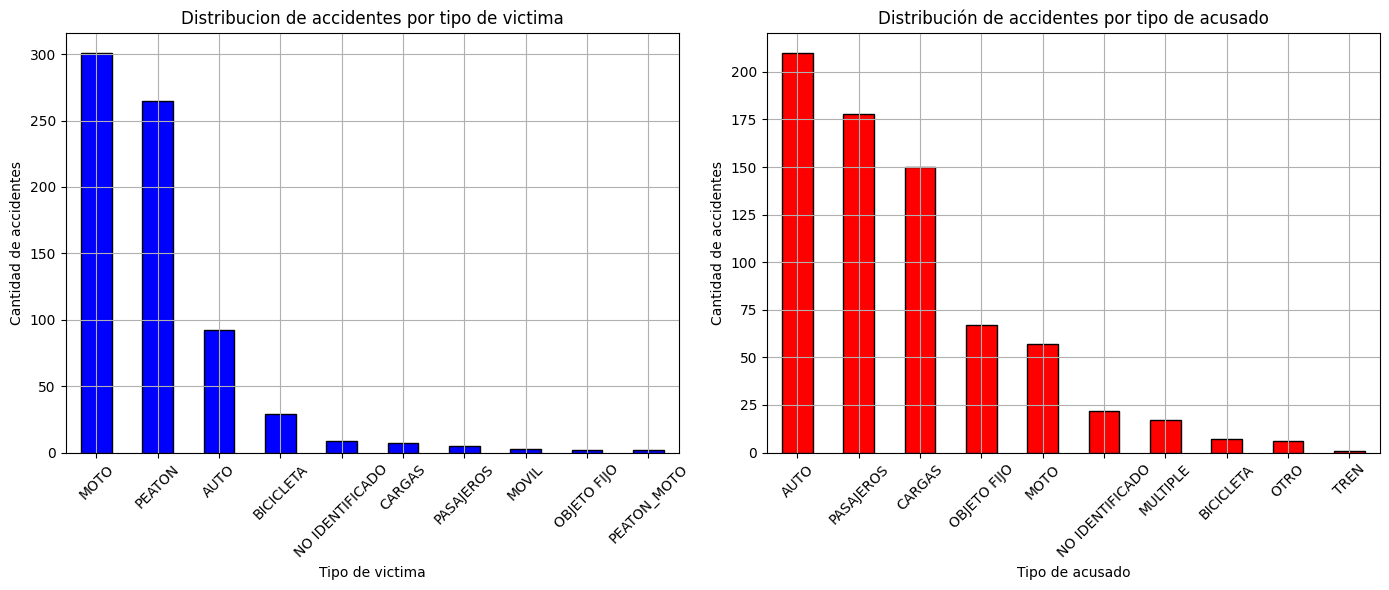

In [53]:
accidentes_por_victima= df_homicidios['VICTIMA'].value_counts()
accidentes_por_acusado= df_homicidios['ACUSADO'].value_counts()

# creamos subgrafico de lado a lado
fig, axs = plt.subplots(1, 2, figsize=(14,6))

# cantidad de victimas por accidente
accidentes_por_victima.plot(kind='bar', edgecolor='black', color='blue', ax=axs[0])
axs[0].set_xlabel('Tipo de victima')
axs[0].set_ylabel('Cantidad de accidentes')
axs[0].set_title('Distribucion de accidentes por tipo de victima')
axs[0].tick_params(axis='x', rotation=45)
axs[0].grid()

#cantidad de acusados por accidente

accidentes_por_acusado.plot(kind="bar", edgecolor="black", color="red", ax=axs[1])
axs[1].set_xlabel("Tipo de acusado")
axs[1].set_ylabel("Cantidad de accidentes")
axs[1].set_title("Distribución de accidentes por tipo de acusado")
axs[1].tick_params(axis='x', rotation=45)
axs[1].grid()

plt.tight_layout()
plt.show()

**CONCLUSION:**

- Se observa que la mayor cantidad de victimas en accidentes, aproximadamente 300 en total, son motociclistas. por otro lado, la mayoria de acusados en estos accidentes son conductores de autos.

- Los peatones son la segunda categoria con mayor cantidad de victimas en accidentes de trafico, superados unicamente por los motociclistas.

- Las bicicletas muestran una baja participacion tanto como victimas como de acusados, podriamos concluir que se consideran vehiculos seguros en terminos de incidencia en eventos viales.

- Top 3 de victimas en accidentes es de motos, peatones y automoviles.

